In [1]:
%cd ..

/Users/bezha/PycharmProjects/TripleStreams


In [2]:
import yaml
import numpy as np
import os
from data import get_flexcontrol_triplestream_dataset

Could not import fluidsynth. AUDIO rendering will not work.
Holoviews not installed. Please install holoviews to be able to generate heatmaps.


In [3]:
# config = yaml.safe_load(open('helpers/configs/FlexControlTripleStreams_0.5.yaml', 'r'))

config = {
    'dataset_root_path': 'data/triple_streams/model_ready/AccentAt0.75/',

    'dataset_files': ['01_candombe_four_voices.pkl.bz2',
                      '02_elbg_both_flattened_left_right.pkl.bz2',
                      '03_groove_midi_crash_hhclosed_hhopen_ride.pkl.bz2',
                      '04_groove_midi_hh_kick_snare_toms.pkl.bz2',
                      '05_groove_midi_hi_lo_mid_ride.pkl.bz2',
                      '06_lmd_bass_brass_drum_percussion.pkl.bz2',
                      '07_lmd_bass_brass_drum_percussive.pkl.bz2',
                      '08_lmd_bass_brass_guitar_percussion.pkl.bz2',
                      '09_lmd_bass_brass_guitar_percussive.pkl.bz2',
                      '10_lmd_bass_brass_guitar_piano.pkl.bz2',
                      '11_lmd_bass_brass_percussion_percussive.pkl.bz2',
                      '12_lmd_bass_brass_percussion_piano.pkl.bz2',
                      '13_lmd_bass_brass_percussive_piano.pkl.bz2',
                      '14_lmd_bass_drum_guitar_percussion.pkl.bz2',
                      '15_lmd_bass_drum_guitar_percussive.pkl.bz2',
                      '16_lmd_bass_drum_percussion_percussive.pkl.bz2',
                      '17_lmd_bass_drum_percussion_piano.pkl.bz2',
                      '18_lmd_bass_drum_percussive_piano.pkl.bz2',
                      '19_lmd_bass_guitar_percussion_percussive.pkl.bz2',
                      '20_lmd_bass_guitar_percussion_piano.pkl.bz2',
                      '21_lmd_bass_guitar_percussive_piano.pkl.bz2',
                      '22_lmd_bass_percussion_percussive_piano.pkl.bz2',
                      '23_lmd_brass_drum_guitar_percussion.pkl.bz2',
                      '24_lmd_brass_drum_guitar_percussive.pkl.bz2',
                      '25_lmd_brass_drum_guitar_piano.pkl.bz2',
                      '26_lmd_brass_drum_percussion_percussive.pkl.bz2',
                      '27_lmd_brass_drum_percussion_piano.pkl.bz2',
                      '28_lmd_brass_drum_percussive_piano.pkl.bz2',
                      '29_lmd_brass_guitar_percussion_percussive.pkl.bz2',
                      '30_lmd_brass_guitar_percussion_piano.pkl.bz2',
                      '31_lmd_brass_guitar_percussive_piano.pkl.bz2',
                      '32_lmd_brass_percussion_percussive_piano.pkl.bz2',
                      '33_lmd_drum_guitar_percussion_percussive.pkl.bz2',
                      '34_lmd_drum_guitar_percussion_piano.pkl.bz2',
                      '35_lmd_drum_guitar_percussive_piano.pkl.bz2',
                      '36_lmd_drum_percussion_percussive_piano.pkl.bz2',
                      '37_lmd_guitar_percussion_percussive_piano.pkl.bz2',
                      '38_ttd_both-is-and_both_flattened_left_right.pkl.bz2',
                      '39_ttd_both-is-or_both_flattened_left_right.pkl.bz2'],

    'max_len': 32,

    'n_encoding_control_tokens':
        [
            101
        ],
    'encoding_control_keys':
        [
            'Structural Similarity Distance',
        ],

    'n_decoding_control_tokens':
        [
            97,
            101,
            101,
            101,
            101
        ],
    'decoding_control_keys':
        [
            'Total Out Hits',
            'Stream 1 Relative Density',
            'Stream 2 Relative Density',
            'Stream 3 Relative Density',
            'Output Step Density',

        ],
}

In [ ]:

is_testing = False

dataset = get_flexcontrol_triplestream_dataset(
        config=config,
        subset_tag="train",
        use_cached=True,
        downsampled_size=2000 if is_testing else None,
        print_logs=False                                #<---  Set to True to print dataset loading logs
    )

In [5]:
structural_similarity_distances_tokens = dataset.encoding_control_tokens[:, 0].numpy()
structural_similarity_distances_values = dataset.encoding_control_values[:, 0].numpy()
structural_similarity_distances_values.max()

1.0000088

In [6]:
structural_similarity_distances_values.shape, structural_similarity_distances_tokens.shape

((2699656,), (2699656,))

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


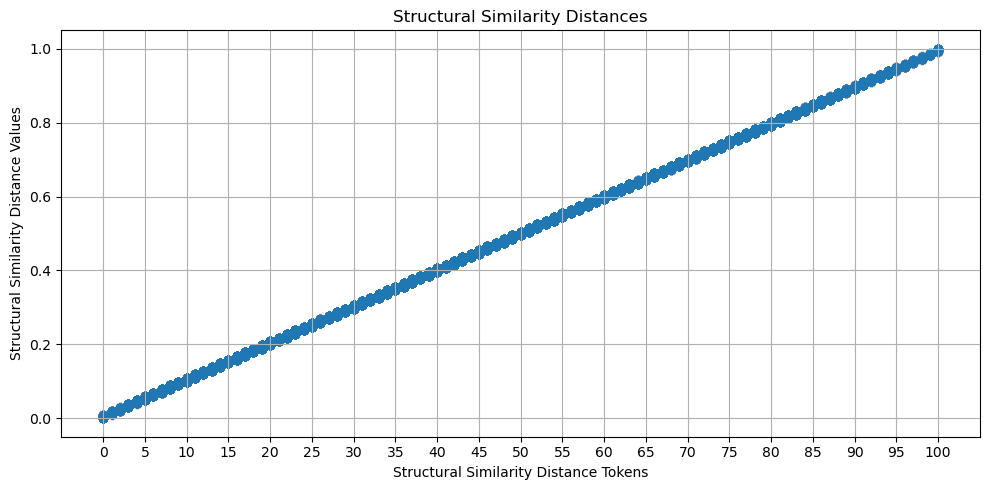

In [7]:
# scatter plot of structural_similarity_distances_values vs structural_similarity_distances_tokens
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
plt.figure(figsize=(10, 5))
plt.scatter(structural_similarity_distances_tokens, structural_similarity_distances_values, alpha=0.01)
plt.title('Structural Similarity Distances')
plt.xlabel('Structural Similarity Distance Tokens')
plt.ylabel('Structural Similarity Distance Values')
plt.xticks(np.arange(0, 105, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

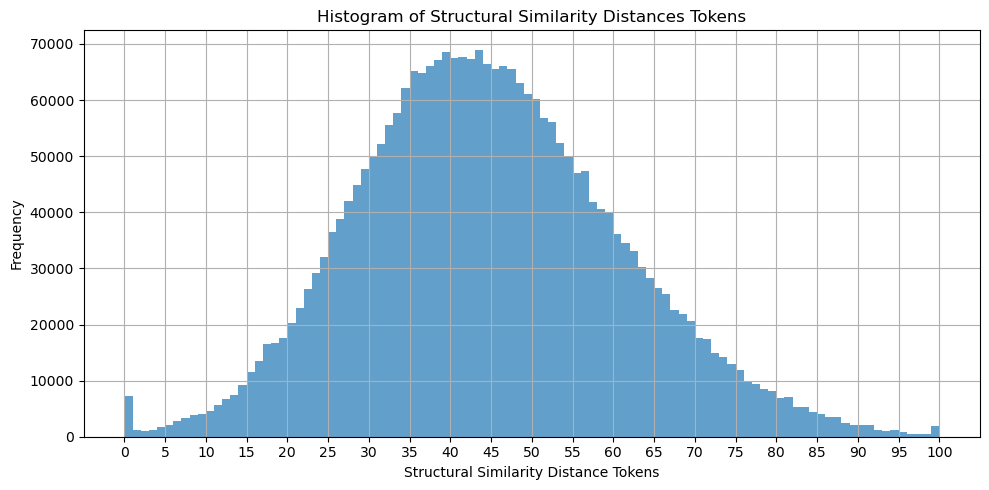

In [8]:
# plot histogram of structural_similarity_distances_tokens
plt.figure(figsize=(10, 5))
plt.hist(structural_similarity_distances_tokens, bins=100, alpha=0.7)
plt.title('Histogram of Structural Similarity Distances Tokens')
plt.xlabel('Structural Similarity Distance Tokens')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 105, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Total Out Hits
total_out_hits_tokens = dataset.decoding_control_tokens[:, 0].numpy()
total_out_hits_values = dataset.decoding_control_values[:, 0].numpy()

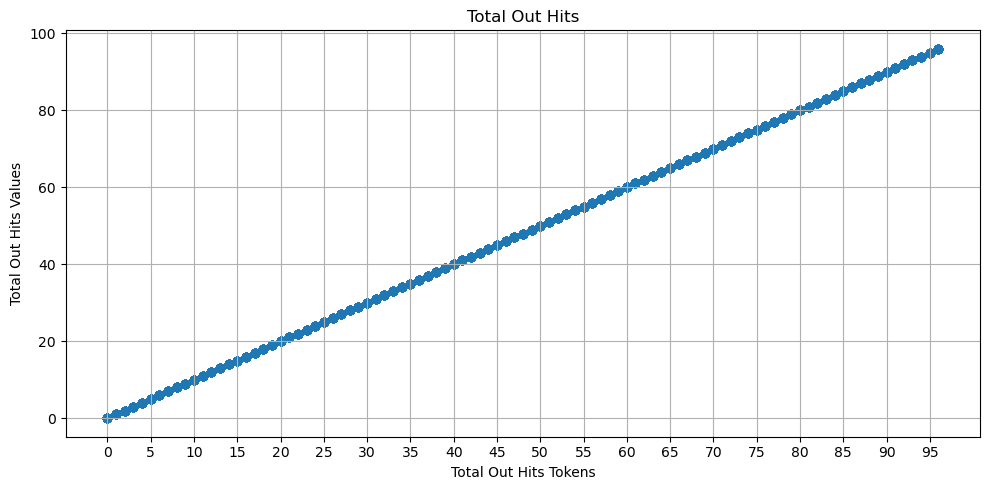

In [10]:

plt.figure(figsize=(10, 5))
plt.scatter(total_out_hits_tokens, total_out_hits_values, alpha=0.01)
plt.title('Total Out Hits')
plt.xlabel('Total Out Hits Tokens')
plt.ylabel('Total Out Hits Values')
plt.xticks(np.arange(0, 99, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

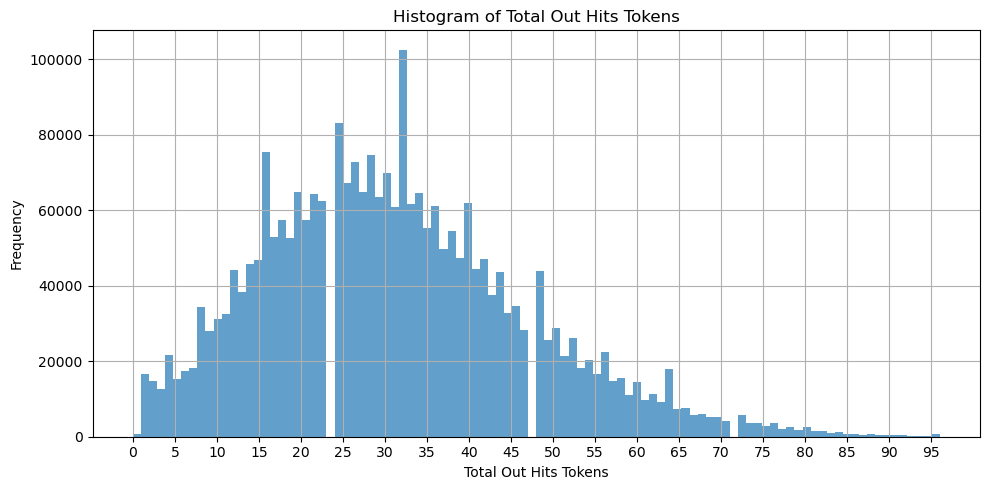

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(total_out_hits_tokens, bins=100, alpha=0.7)
plt.title('Histogram of Total Out Hits Tokens')
plt.xlabel('Total Out Hits Tokens')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 99, 5))
plt.grid(True)
plt.tight_layout()
plt.show()



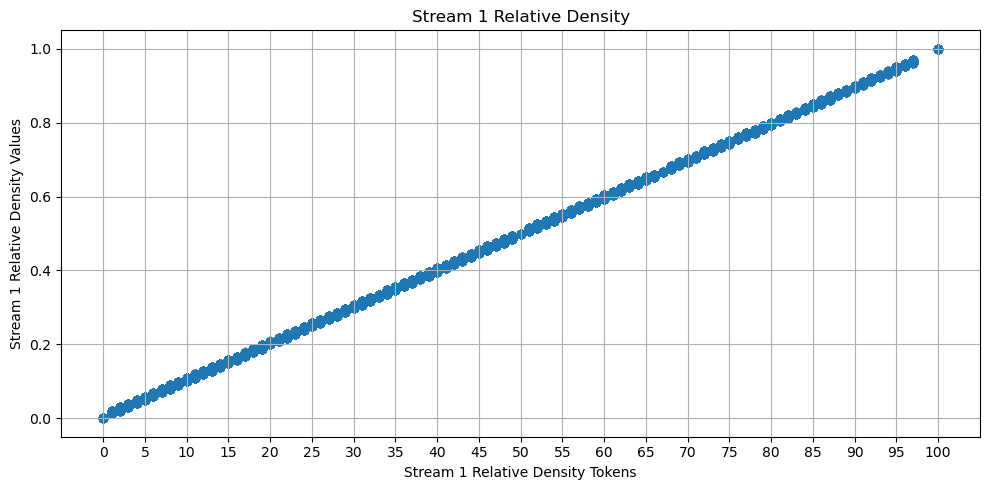

In [12]:
# Stream 1 Relative Density
stream_1_relative_density_tokens = dataset.decoding_control_tokens[:, 1].numpy()
stream_1_relative_density_values = dataset.decoding_control_values[:, 1].numpy()
plt.figure(figsize=(10, 5))
plt.scatter(stream_1_relative_density_tokens, stream_1_relative_density_values, alpha=0.01)
plt.title('Stream 1 Relative Density')
plt.xlabel('Stream 1 Relative Density Tokens')
plt.ylabel('Stream 1 Relative Density Values')
plt.xticks(np.arange(0, 101, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

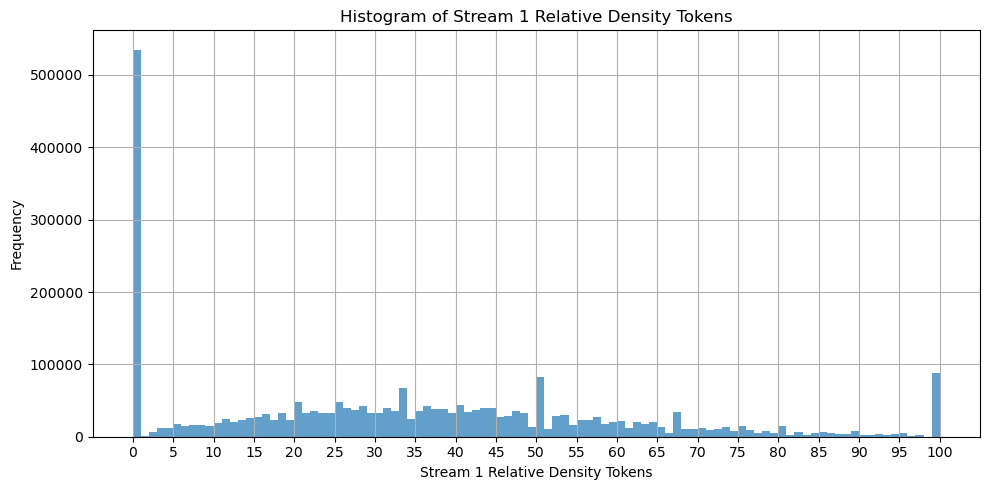

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(stream_1_relative_density_tokens, bins=100, alpha=0.7)
plt.title('Histogram of Stream 1 Relative Density Tokens')
plt.xlabel('Stream 1 Relative Density Tokens')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 5))
plt.grid(True)
plt.tight_layout()
plt.show()


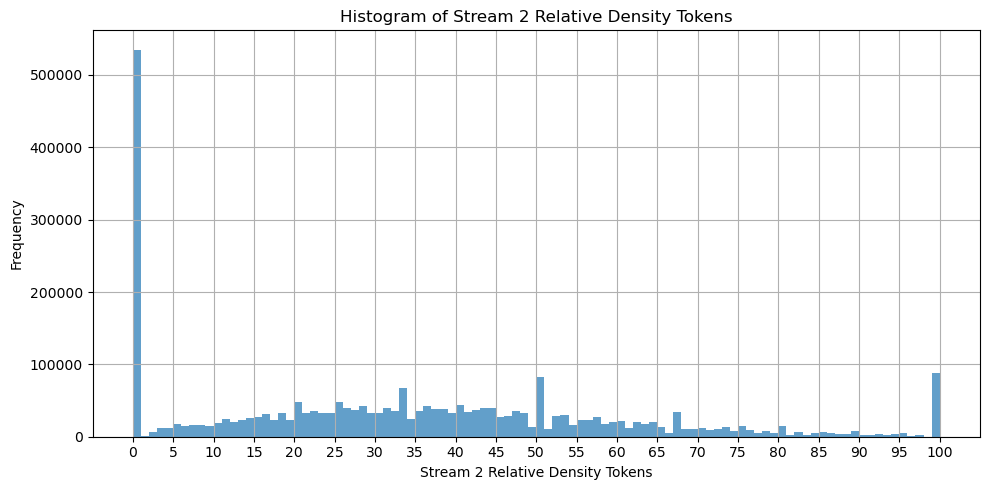

In [14]:
# Stream 2 Relative Histogram
stream_2_relative_density_tokens = dataset.decoding_control_tokens[:, 2].numpy()
stream_2_relative_density_values = dataset.decoding_control_values[:, 2].numpy()
plt.figure(figsize=(10, 5))
plt.hist(stream_2_relative_density_tokens, bins=100, alpha=0.7)
plt.title('Histogram of Stream 2 Relative Density Tokens')
plt.xlabel('Stream 2 Relative Density Tokens')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 5))
plt.grid(True)
plt.tight_layout()
plt.show()


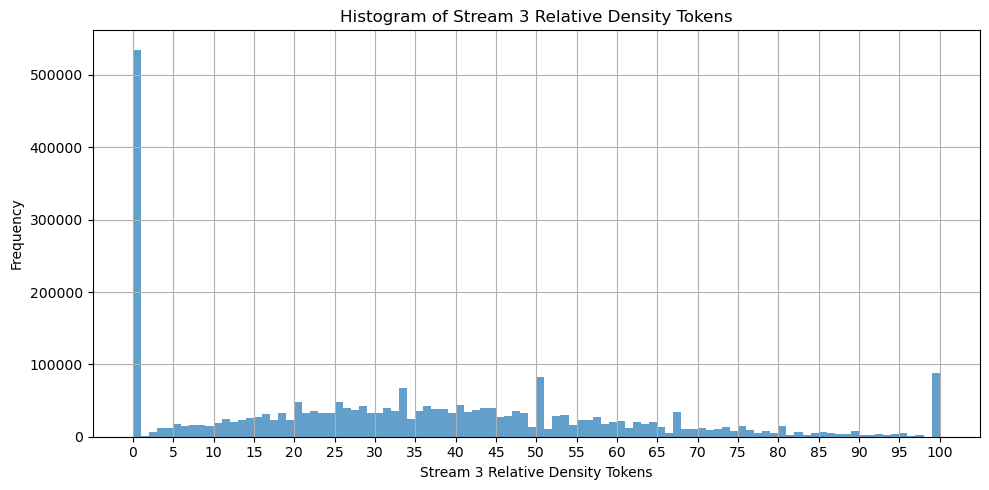

In [15]:
# Stream 3 Relative Histogram
stream_3_relative_density_tokens = dataset.decoding_control_tokens[:, 3].numpy()
stream_3_relative_density_values = dataset.decoding_control_values[:, 3].numpy()
plt.figure(figsize=(10, 5))
plt.hist(stream_3_relative_density_tokens, bins=100, alpha=0.7)
plt.title('Histogram of Stream 3 Relative Density Tokens')
plt.xlabel('Stream 3 Relative Density Tokens')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 101, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
# Output Step Density
output_step_density_tokens = dataset.decoding_control_tokens[:, 4].numpy()
output_step_density_values = dataset.decoding_control_values[:, 4].numpy()
plt.figure(figsize=(10, 5))
plt.scatter(output_step_density_tokens, output_step_density_values, alpha=0.01)
plt.title('Output Step Density')
plt.xlabel('Output Step Density Tokens')
plt.ylabel('Output Step Density Values')
plt.xticks(np.arange(0, 101, 5))
plt.grid(True)
plt.tight_layout()
plt.show()



NameError: name 'dataset' is not defined

In [16]:
#pair decoding control tokens, and plot histogram of each pair
import tqdm

paired_tokens = []
for i in tqdm.trange(len(dataset)):
    paired_tokens.append(
        (
            dataset.encoding_control_tokens[i, 0].item(),
            dataset.decoding_control_tokens[i, 0].item(),
            dataset.decoding_control_tokens[i, 1].item(),
            dataset.decoding_control_tokens[i, 2].item(),
            dataset.decoding_control_tokens[i, 3].item(),
        )
    )


100%|██████████| 2699656/2699656 [00:14<00:00, 187257.37it/s]


In [17]:
# get counts of each pair
from collections import Counter
paired_tokens_counts = Counter(paired_tokens)
# sort by token values
paired_tokens_counts

Counter({(17, 1, 0, 100, 0): 710,
         (17, 1, 0, 0, 100): 710,
         (17, 1, 100, 0, 0): 710,
         (0, 0, 0, 0, 0): 480,
         (15, 4, 0, 0, 100): 386,
         (15, 4, 0, 100, 0): 386,
         (15, 4, 100, 0, 0): 386,
         (29, 16, 0, 100, 0): 348,
         (29, 16, 0, 0, 100): 348,
         (29, 16, 100, 0, 0): 348,
         (27, 16, 0, 100, 0): 332,
         (27, 16, 0, 0, 100): 332,
         (27, 16, 100, 0, 0): 332,
         (16, 4, 100, 0, 0): 324,
         (16, 4, 0, 100, 0): 324,
         (16, 4, 0, 0, 100): 324,
         (41, 16, 100, 0, 0): 322,
         (41, 16, 0, 100, 0): 322,
         (41, 16, 0, 0, 100): 322,
         (17, 4, 100, 0, 0): 316,
         (17, 4, 0, 100, 0): 316,
         (17, 4, 0, 0, 100): 316,
         (18, 4, 100, 0, 0): 310,
         (18, 4, 0, 100, 0): 310,
         (18, 4, 0, 0, 100): 310,
         (28, 16, 100, 0, 0): 308,
         (28, 16, 0, 100, 0): 308,
         (28, 16, 0, 0, 100): 308,
         (26, 16, 0, 100, 0): 304,
    

ValueError: input operand has more dimensions than allowed by the axis remapping

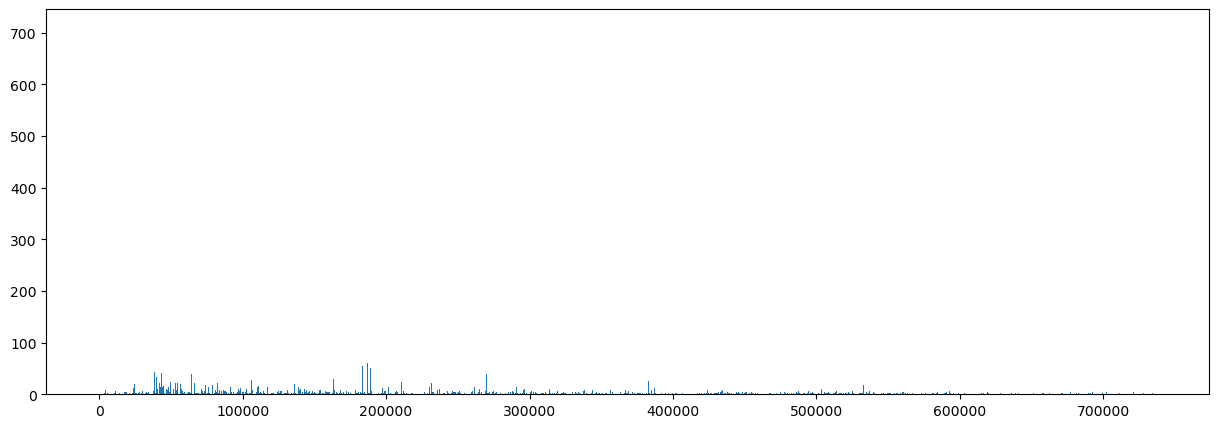

In [18]:
# plot counts (x is pair, y is count) without tickmarks for x axis
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.bar(range(len(paired_tokens_counts)), list(paired_tokens_counts.values()), tick_label=list(paired_tokens_counts.keys()))
plt.title('Counts of Paired Tokens')
plt.xlabel('Paired Tokens')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()